<a href="https://colab.research.google.com/github/wcaraker76/4GeeksProjects/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Install Yahoo Finance package (“pip install finance”)
!pip install "yfinance"

import yfinance as yf


In [ ]:
#Scrape the following page to get the list (names and symbols) of the top 10 holding in the SPY market
url = 'https://www.investopedia.com/articles/investing/122215/spy-spdr-sp-500-trust-etf.asp'

#make the html searchable 
response = get(url)

html_soup = BeautifulSoup(response.text, "html.parser")

#Find the table in html
top_table = html_soup.find("table", class_ = "mntl-sc-block-table__table")

top_table

<table class="mntl-sc-block-table__table">
<colgroup span="1" style=""></colgroup>
<colgroup span="1" style=""></colgroup>
<thead>
<tr>
<th class="mntl-sc-block-table__title" colspan="2">SPY ETF’s Top 10 Holdings (as of January 2022)</th>
</tr>
<tr>
<th>Holding (Company)</th>
<th>% SPY Portfolio Weight</th>
</tr>
</thead>
<tbody data-check="0">
<tr>
<td>Apple Inc. (<a data-component="link" data-ordinal="1" data-source="inlineLink" data-type="internalLink" href="https://www.investopedia.com/markets/quote?tvwidgetsymbol=AAPL">AAPL</a>)</td>
<td>6.98%</td>
</tr>
<tr>
<td>Microsoft Corp. (<a data-component="link" data-ordinal="1" data-source="inlineLink" data-type="internalLink" href="https://www.investopedia.com/markets/quote?tvwidgetsymbol=MSFT">MSFT</a>)</td>
<td>6.19%</td>
</tr>
<tr>
<td>Amazon.com Inc. (<a data-component="link" data-ordinal="1" data-source="inlineLink" data-type="internalLink" href="https://www.investopedia.com/markets/quote?tvwidgetsymbol=AMZN">AMZN</a>)</td>
<td>3.6

In [ ]:
#get the rows of the table
rows= top_table.find_all("td")
#put the text of the rows into a list
data = [row.text.strip() for row in rows]

data

['Apple Inc. (AAPL)',
 '6.98%',
 'Microsoft Corp. (MSFT)',
 '6.19%',
 'Amazon.com Inc. (AMZN)',
 '3.66%',
 'Tesla Inc. (TSLA)',
 '2.40%',
 'Alphabet Inc. — Class A (GOOGL)',
 '2.15%',
 'Alphabet Inc. — Class C (GOOG)',
 '2.00%',
 'Meta Platforms (Facebook) (FB)',
 '1.97%',
 'NVIDIA Corp. (NVDA)',
 '1.85%',
 'Berkshire Hathaway Inc. — Class B (BRK.B)',
 '1.36%',
 'JPMorgan Chase & Co. (JPM)',
 '1.18%']

In [ ]:
#make the list a string
data_string = ''.join([str(item) for item in data])

type(data_string)

str

In [ ]:
#get only the ticker abbreviations
abrev = re.findall('\(([A-Z.]*)\)', data_string)

print(abrev)

#make those a string so you can replace the . in any of the stocks bc yfinance doesn't use .
abrev_string = ' '.join([str(item) for item in abrev])

abrev_string = abrev_string.replace(".", "-")
#add the SPY to the data so you can use if for your dataframe
stock = abrev_string + ' SPY'

print(stock)

['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'FB', 'NVDA', 'BRK.B', 'JPM']
AAPL MSFT AMZN TSLA GOOGL GOOG FB NVDA BRK-B JPM SPY


In [ ]:
#Download market data and the SPY market for 5 years as one data frame. 

df = yf.download( stock, period= '5y')["Adj Close"]


display(df)

[*********************100%***********************]  11 of 11 completed


,AAPL,AMZN,BRK-B,FB,GOOG,GOOGL,JPM,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,,,
2017-01-30,28.622025,830.380005,164.800003,130.979996,802.320007,823.830017,75.023918,60.556442,27.147186,208.261703,50.125999
2017-01-31,28.556137,823.479980,164.139999,130.320007,796.789978,820.190002,73.803017,60.110168,26.939917,208.243378,50.386002
2017-02-01,30.297510,832.349976,163.610001,133.229996,795.695007,815.239990,74.082077,59.115295,28.116905,208.325760,49.848000
2017-02-02,30.245739,839.950012,163.000000,130.839996,798.530029,818.260010,73.768127,58.734089,28.472218,208.463074,50.310001
2017-02-03,30.375164,810.200012,163.940002,130.979996,801.489990,820.130005,76.026794,59.208275,28.223003,209.899994,50.265999
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,161.619995,2890.879883,303.730011,308.709991,2607.439941,2616.080078,144.949997,296.369995,233.720001,439.839996,930.000000
2022-01-25,159.779999,2799.719971,307.190002,300.149994,2534.709961,2538.699951,146.529999,288.489990,223.240005,434.470001,918.400024
2022-01-26,159.690002,2777.449951,309.260010,294.630005,2584.800049,2584.659912,147.919998,296.709991,227.720001,433.380005,937.409973


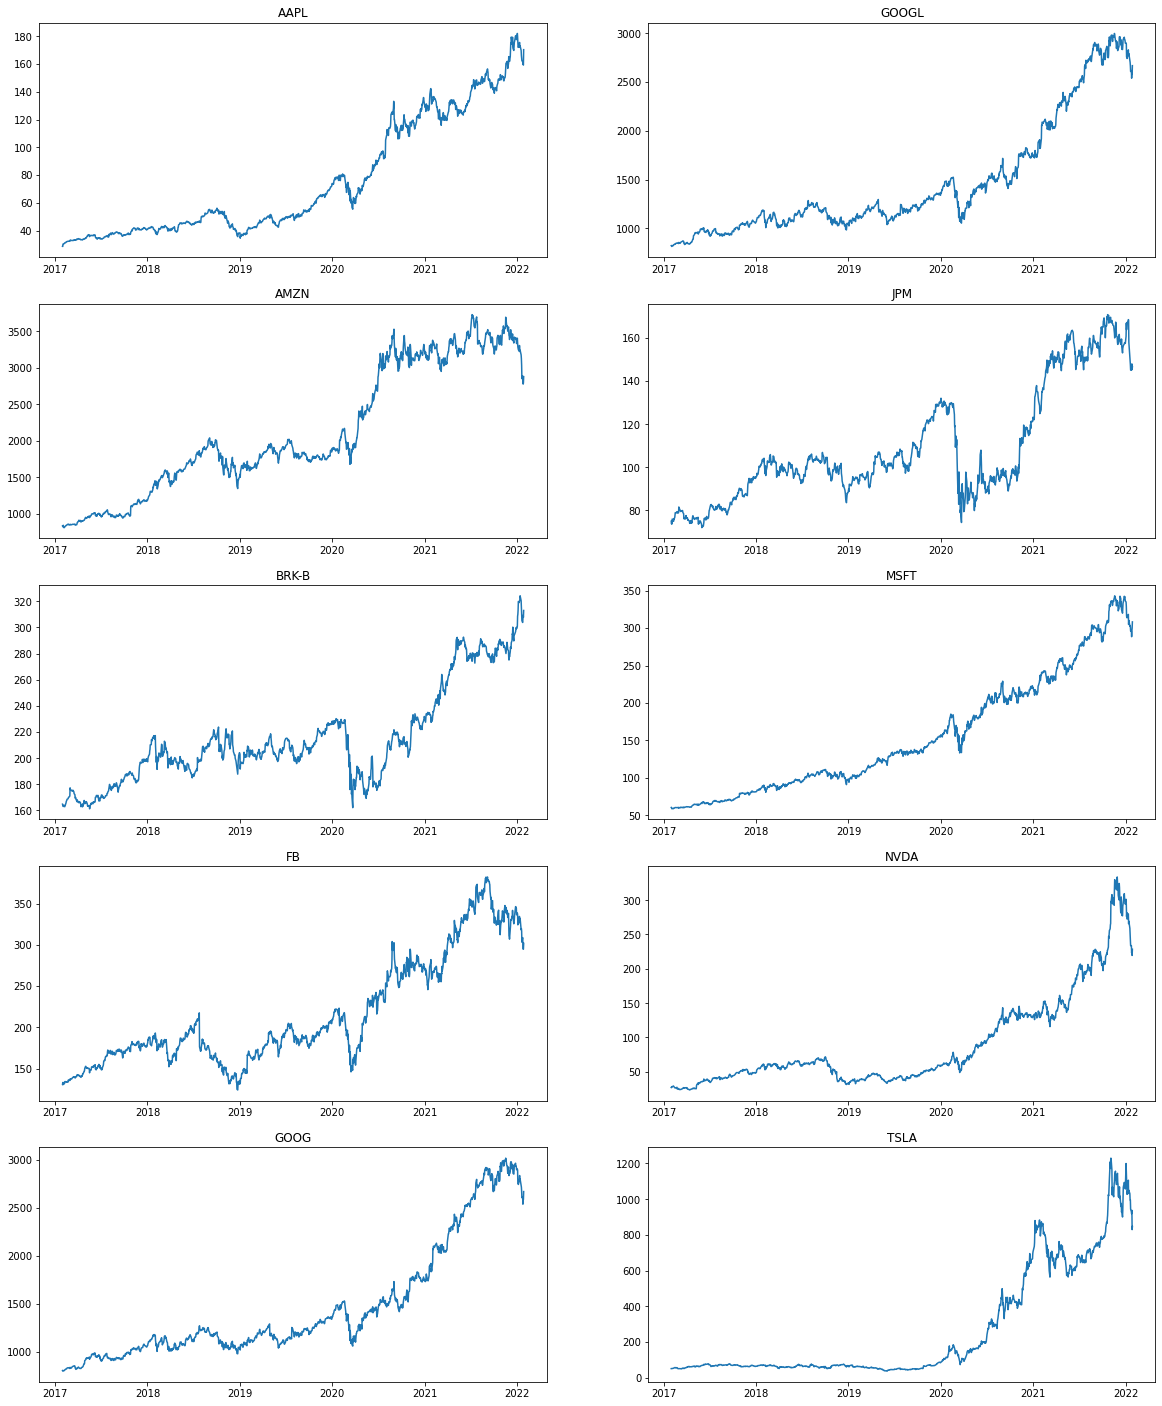

In [ ]:
#create a subplot grid of 5 x 2 and plot the adj cp for each holding as price vs time. 
#make for loop 1 line using dividend and remainder of 5 for the x and y 
df2 = df.drop("SPY", axis = 1)

fig, axes = plt.subplots(5,2, figsize=(20, 25))
count = 0

for t in df2.columns:
  if (count <= 4):
    axes[count][0].plot(df2[t])
    axes[count][0].title.set_text(df2.columns[count])
    count += 1
  elif(count > 4):
    axes[(count - 5)][1].plot(df2[t])
    axes[(count - 5)][1].title.set_text(df2.columns[count])
    count += 1


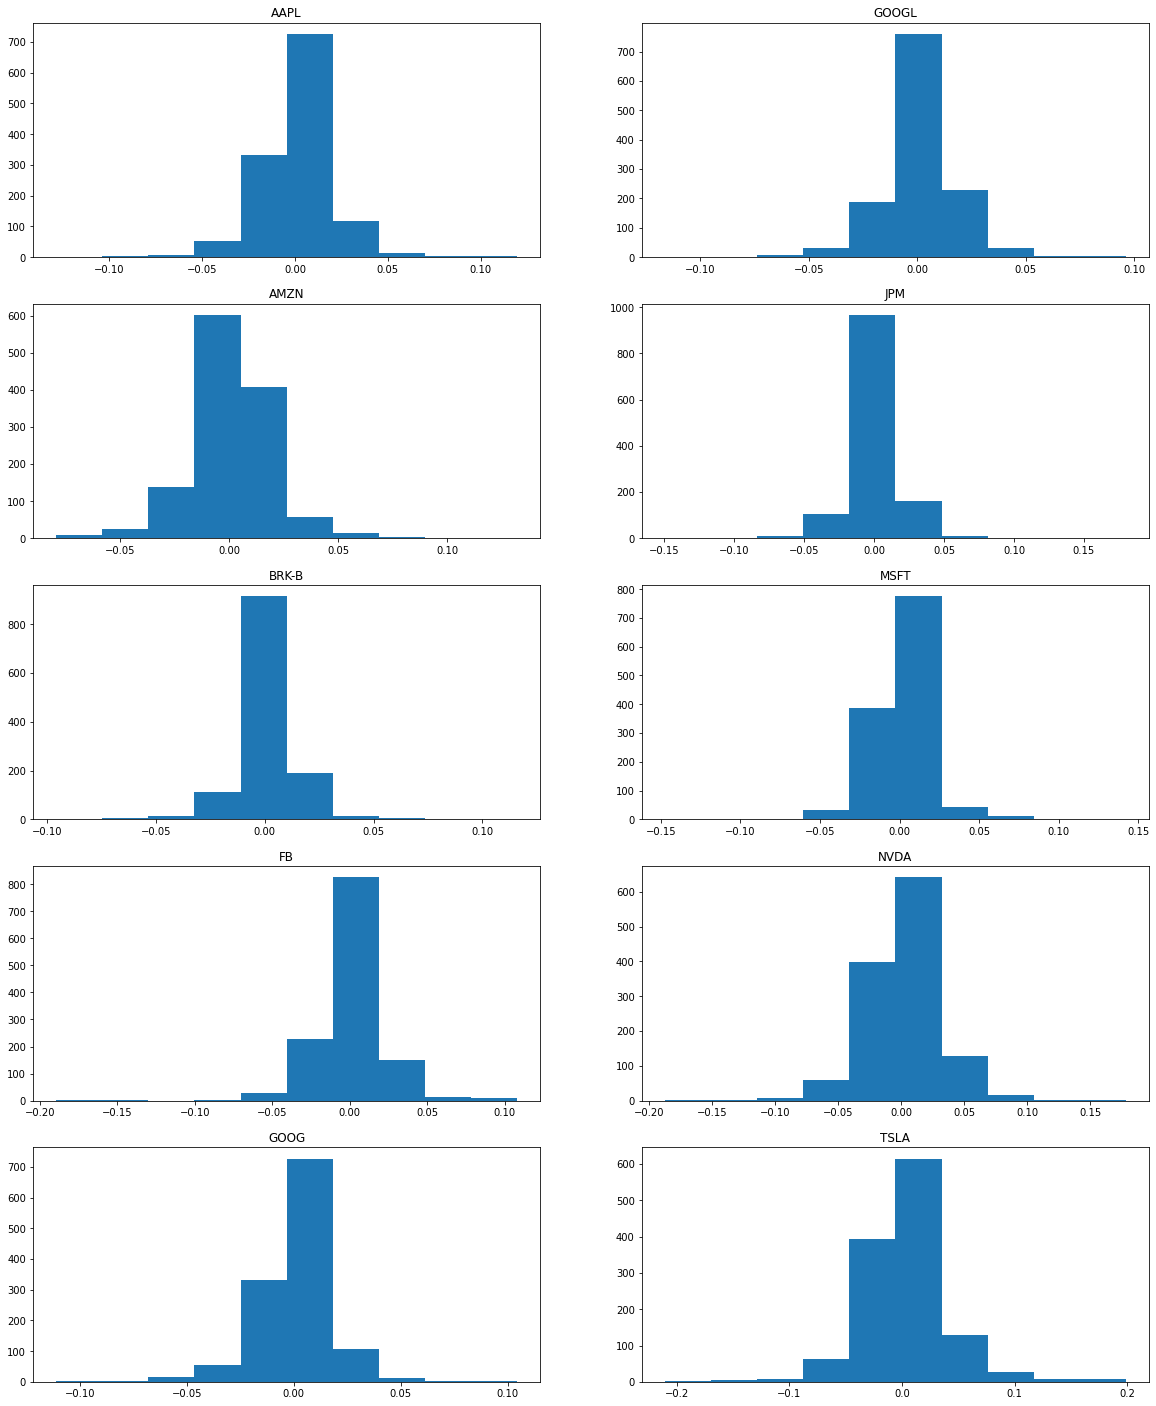

In [ ]:
#calculate pct change of each stock 

pct_df = df2.pct_change()

pct_df = pct_df.dropna()

pct_df

#plot them
fig, axes = plt.subplots(5,2, figsize=(20, 25))
count = 0

for t in pct_df.columns:
  if (count <= 4):
    axes[count][0].hist(pct_df[t])
    axes[count][0].title.set_text(pct_df.columns[count])
    count += 1
  elif(count > 4):
    axes[(count - 5)][1].hist(pct_df[t])
    axes[(count - 5)][1].title.set_text(pct_df.columns[count])
    count += 1

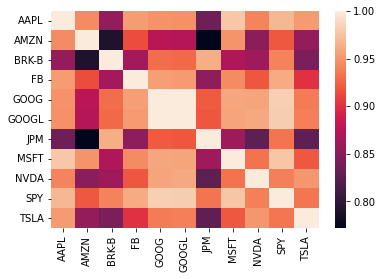

<Figure size 1800x1080 with 0 Axes>

In [ ]:
#Make a heat map with the correlation coeffecient of each of the stocks

import seaborn as sns
correlated = df.corr()
heat = sns.heatmap(correlated)

plt.figure(figsize= (25, 15))

heat
plt.show()

In [ ]:
#find the monthly return and plot it on one graph. 

#melt the graph to get the symbols with the prices
melted = df2.melt(var_name= 'Symbol', value_name= 'Price', ignore_index=False)

#find the percent change
melted["Return"] = melted.groupby('Symbol')['Price'].pct_change()

#we don't have full data for the entirety of january so just drop the na
melted.dropna(inplace=True)

#make a month date column to make it easier to calculate without business days.
melted["mdate"] = melted.index.to_period("M")

#make a new column with return+1
melted["plus_1"] = melted["Return"] + 1
#for the monthly return make another column 
melted["Monthly"] = melted.groupby(['Symbol', 'mdate'])['plus_1'].transform(np.product) - 1

#make a new dataframe with the duplicate monthly data being gone
monthly = melted.drop_duplicates(subset= ['Symbol', 'mdate'], keep= 'last')

monthly = monthly.pivot_table(index= monthly.index, columns= ['Symbol'])

In [ ]:
monthly.drop(['Price', 'Return', 'plus_1'], axis=1, inplace=True)
monthly.columns = monthly.columns.droplevel(0)

monthly

Symbol,AAPL,AMZN,BRK-B,FB,GOOG,GOOGL,JPM,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2017-01-31,-0.002302,-0.008309,-0.004005,-0.005039,-0.006893,-0.004418,-0.016273,-0.007370,-0.007635,0.005187
2017-02-28,0.133778,0.026182,0.044352,0.040055,0.033158,0.030164,0.070779,-0.004364,-0.069353,-0.007701
2017-03-31,0.048690,0.049110,-0.027651,0.048030,0.007714,0.003397,-0.030678,0.029384,0.073413,0.113245
2017-04-28,-0.000070,0.043371,-0.008819,0.057726,0.092097,0.090493,-0.003872,0.039478,-0.042504,0.128530
2017-05-31,0.067807,0.075276,0.000424,0.008053,0.065014,0.067678,-0.055747,0.026005,0.385446,0.085777
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,-0.068037,-0.053518,-0.044896,-0.105409,-0.083847,-0.076169,0.023382,-0.066119,-0.074559,0.054042
2021-10-29,0.058657,0.026602,0.051550,-0.046613,0.112595,0.107499,0.044131,0.176291,0.234167,0.436530
2021-11-30,0.105082,0.039924,-0.035957,0.002751,-0.039242,-0.041531,-0.065101,-0.001282,0.278054,0.027612


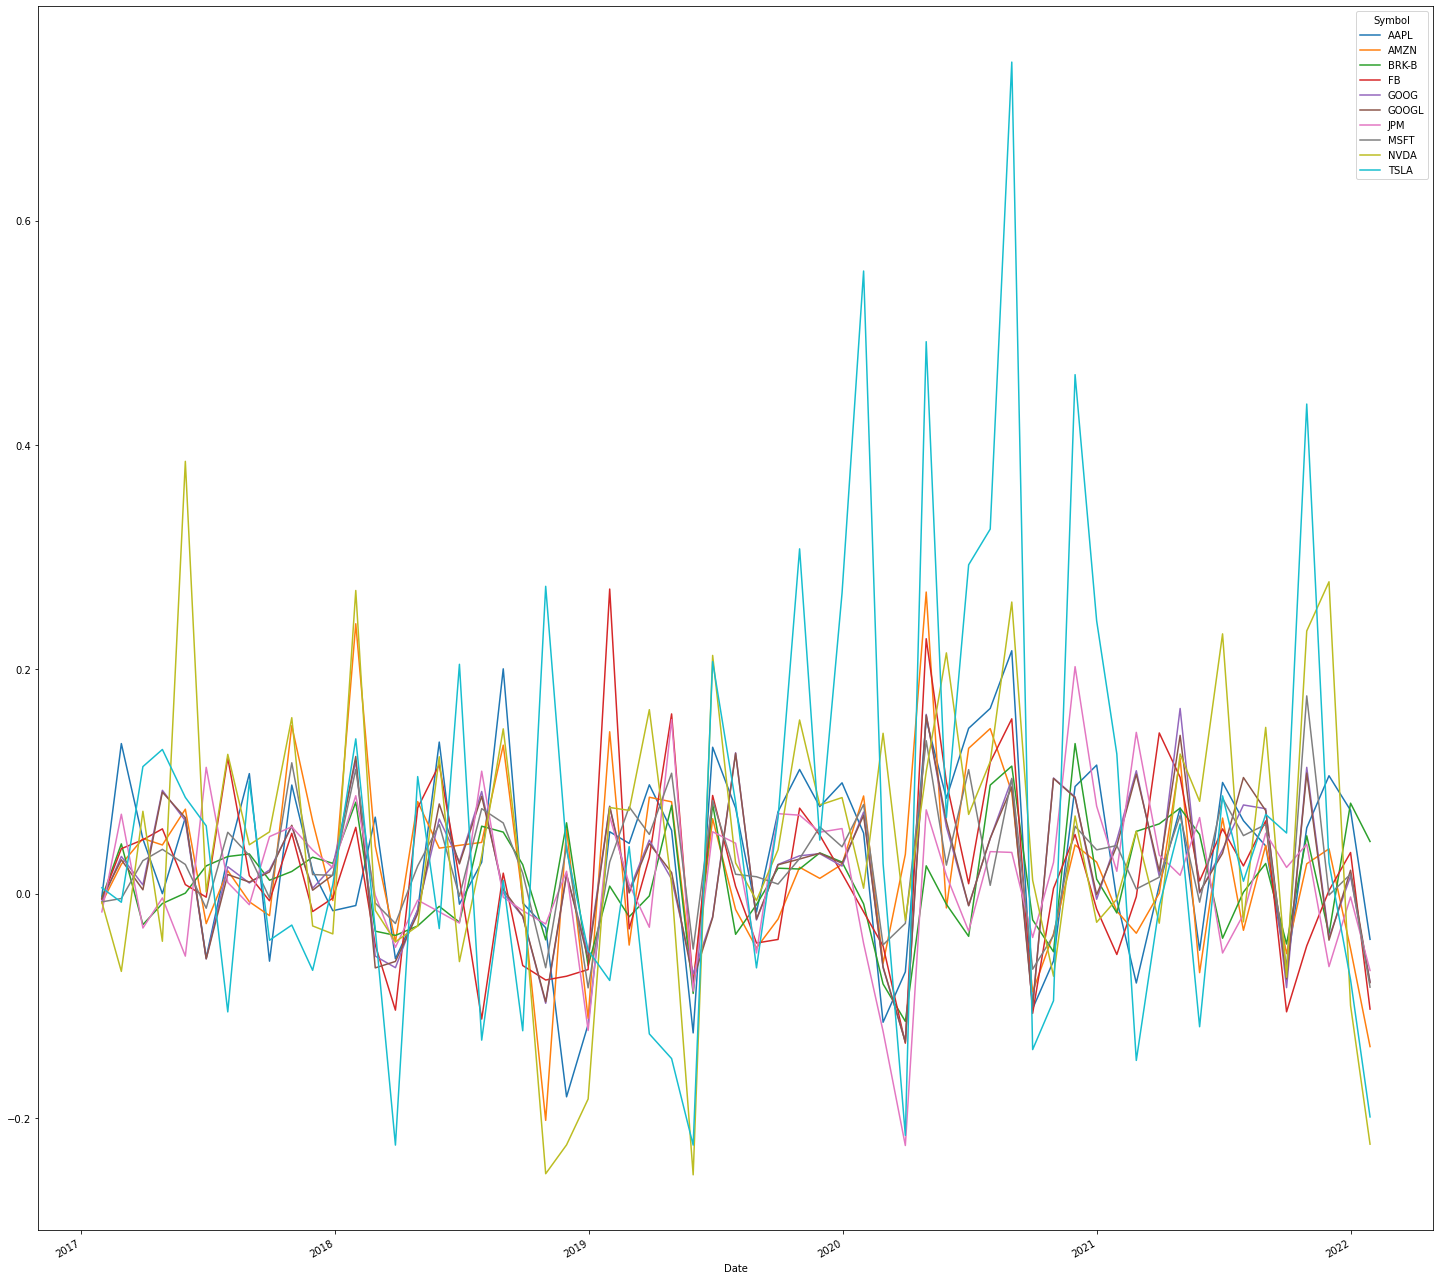

In [ ]:

monthly.plot(figsize=(25,25))

plt.show()